In [2]:
import numpy as np
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
full_data = pd.read_csv('kc_house_data.csv', header = 0)

In [4]:
full_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
full_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
full_data = full_data.sample(frac=1)

In [7]:
train = full_data.iloc[:17290]
val = full_data.iloc[17290:]

In [ ]:
from google.colab import files
train.to_csv('train.csv', index=False)
val.to_csv('val.csv', index=False)
files.download('train.csv')
files.download('val.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv('train.csv', header = 0)
val = pd.read_csv('val.csv', header = 0)

In [8]:
full_data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


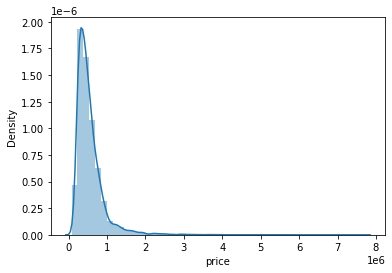

In [9]:
sns.distplot(full_data['price']);

In [10]:
print("Skewness: %f" % full_data['price'].skew())
print("Kurtosis: %f" % full_data['price'].kurt())

Skewness: 4.024069
Kurtosis: 34.585540


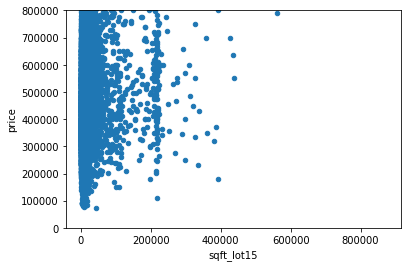

In [11]:
var = 'sqft_lot15'
data = pd.concat([full_data['price'], full_data[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000));

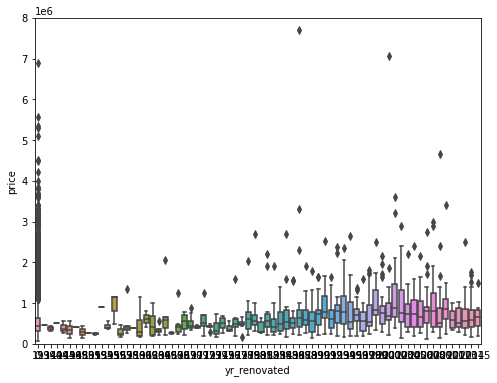

In [12]:
var = 'yr_renovated'
data = pd.concat([full_data['price'], full_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

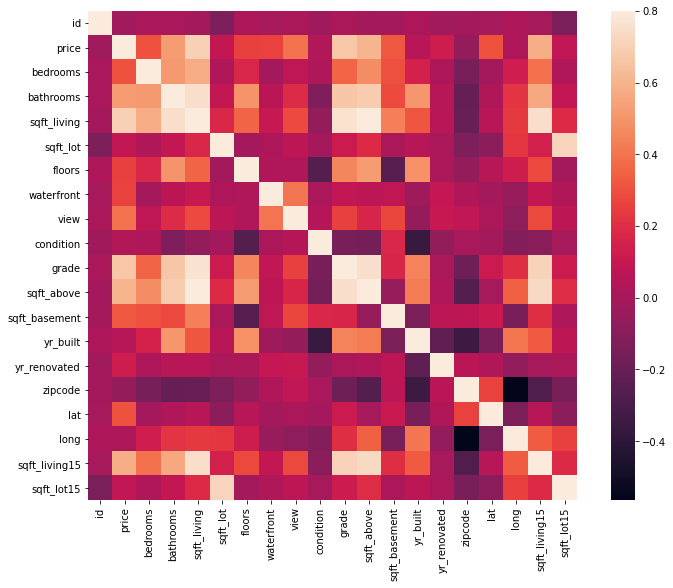

In [13]:
corrmat = full_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

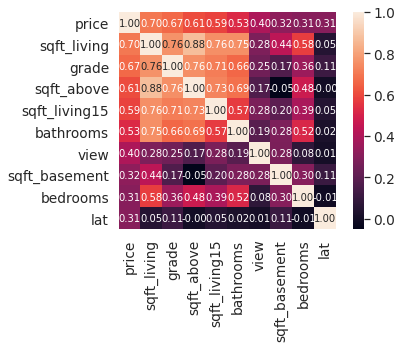

In [14]:
k = 10
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(full_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


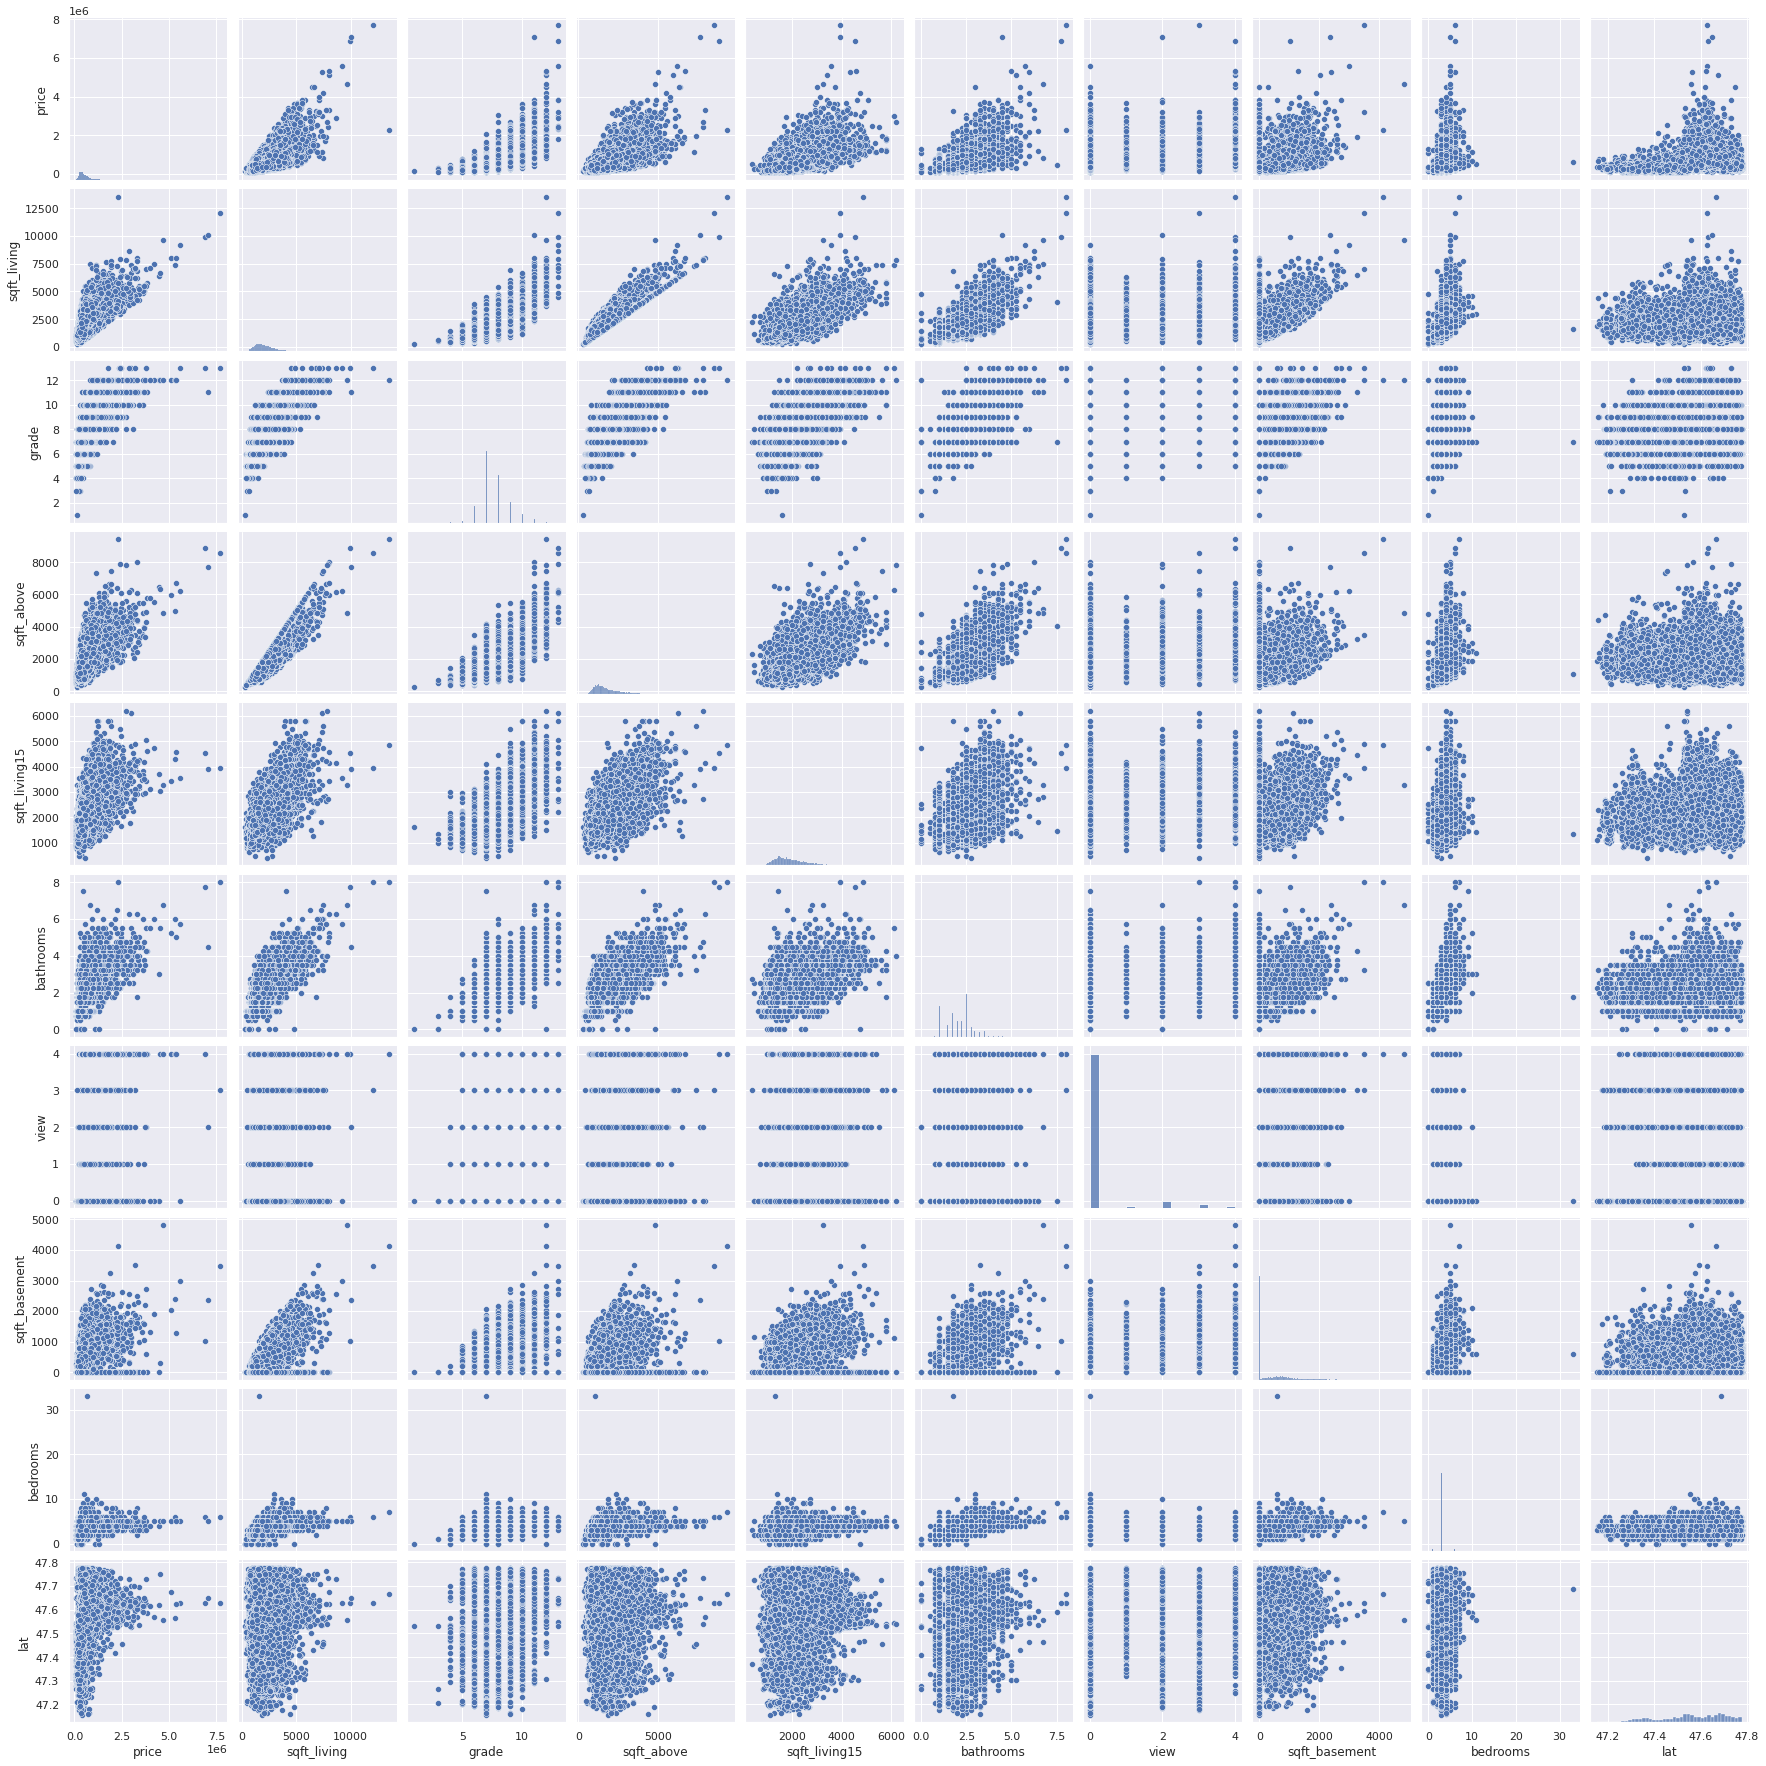

In [15]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
sns.pairplot(full_data[cols], size = 2.5)
plt.show();

In [16]:
total = full_data.isnull().sum().sort_values(ascending=False)
percent = (full_data.isnull().sum()/full_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
sqft_lot15,0,0.0
view,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(full_data['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]

outer range (high) of the distribution:
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


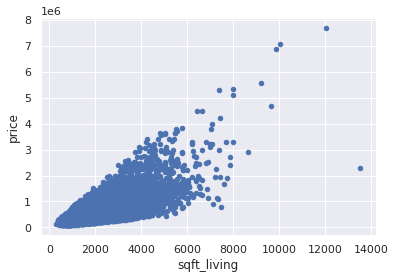

In [18]:
var = 'sqft_living'
data = pd.concat([full_data['price'], full_data[var]], axis=1)
data.plot.scatter(x=var, y='price');

In [19]:
full_data['sqft_living']

13764    1010
8475     2340
3942     1990
7696     2130
1573     2400
         ... 
17997    2320
20913    1350
6953     1810
6508     5480
13947    2190
Name: sqft_living, Length: 21613, dtype: int64

In [20]:
Q3 = full_data['sqft_living'].quantile(0.99998324)
print(Q3)

13000.29649120479


In [21]:
full_data = full_data.drop(full_data[full_data['sqft_living'] > 13000].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


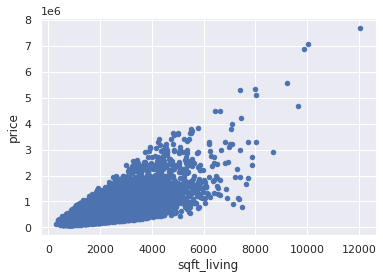

In [22]:
var = 'sqft_living'
data = pd.concat([full_data['price'], full_data[var]], axis=1)
data.plot.scatter(x=var, y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


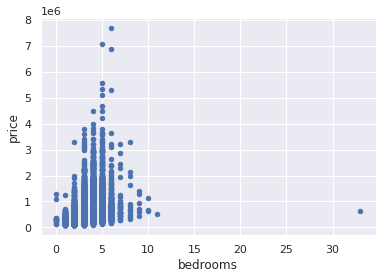

In [23]:
var = 'bedrooms'
data = pd.concat([full_data['price'], full_data[var]], axis=1)
data.plot.scatter(x=var, y='price');

In [24]:
Q3 = full_data['bedrooms'].quantile(0.9999937)
print(Q3)

30.004715399991255


In [25]:
full_data = full_data.drop(full_data[full_data['bedrooms'] > 30].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


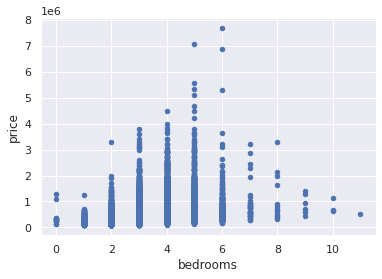

In [26]:
var = 'bedrooms'
data = pd.concat([full_data['price'], full_data[var]], axis=1)
data.plot.scatter(x=var, y='price');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


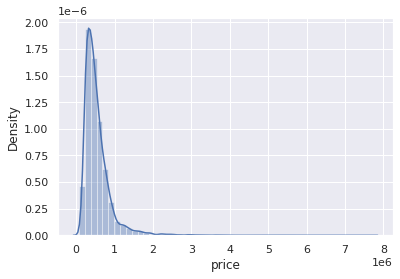

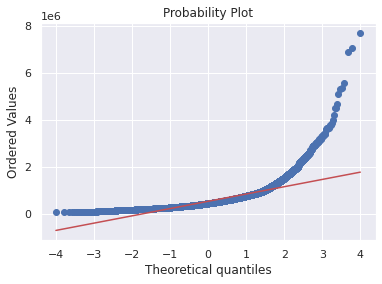

In [28]:
from scipy import stats

sns.distplot(full_data['price']);
fig = plt.figure()
res = stats.probplot(full_data['price'], plot=plt)

In [29]:
full_data['price'] = np.log(full_data['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


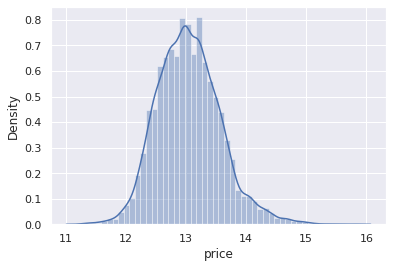

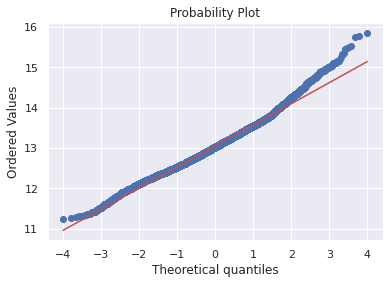

In [31]:
sns.distplot(full_data['price']);
fig = plt.figure()
res = stats.probplot(full_data['price'], plot=plt)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


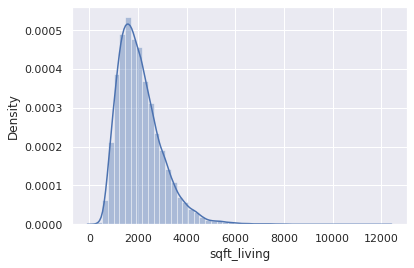

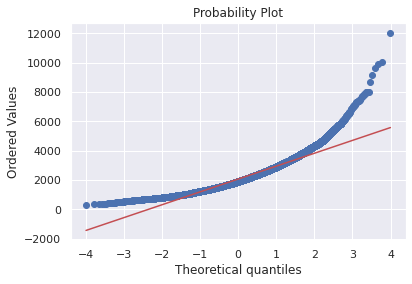

In [32]:
sns.distplot(full_data['sqft_living']);
fig = plt.figure()
res = stats.probplot(full_data['sqft_living'], plot=plt)

In [33]:
full_data['sqft_living'] = np.log(full_data['sqft_living'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


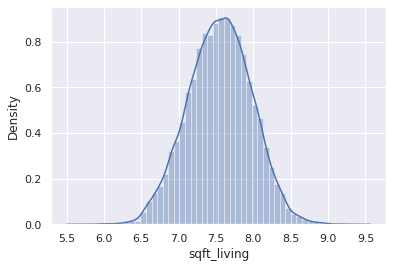

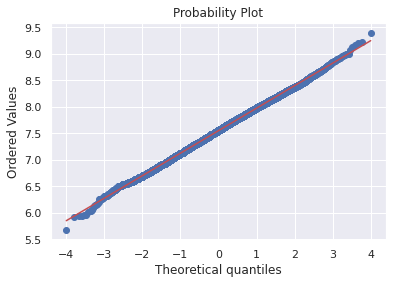

In [34]:
sns.distplot(full_data['sqft_living']);
fig = plt.figure()
res = stats.probplot(full_data['sqft_living'], plot=plt)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


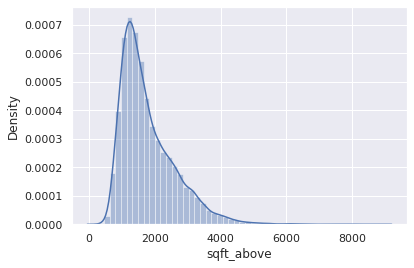

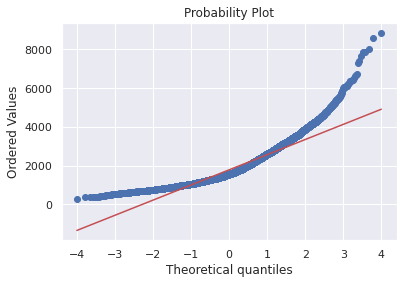

In [35]:
sns.distplot(full_data['sqft_above']);
fig = plt.figure()
res = stats.probplot(full_data['sqft_above'], plot=plt)

In [36]:
full_data['sqft_above'] = np.log(full_data['sqft_above'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


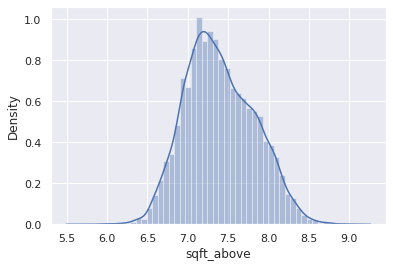

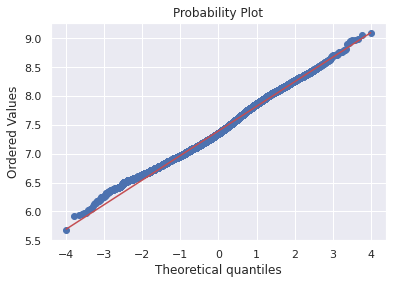

In [37]:
sns.distplot(full_data['sqft_above']);
fig = plt.figure()
res = stats.probplot(full_data['sqft_above'], plot=plt)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


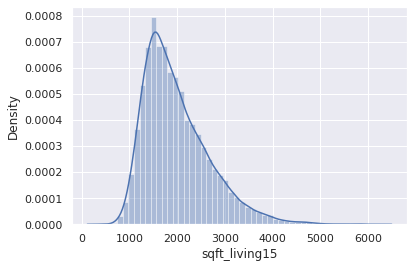

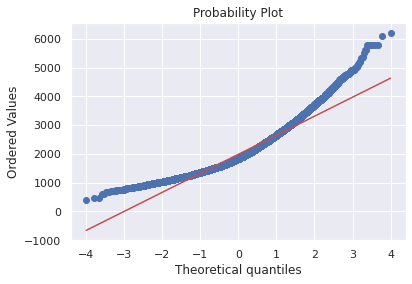

In [38]:
sns.distplot(full_data['sqft_living15']);
fig = plt.figure()
res = stats.probplot(full_data['sqft_living15'], plot=plt)

In [39]:
full_data['sqft_living15'] = np.log(full_data['sqft_living15'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


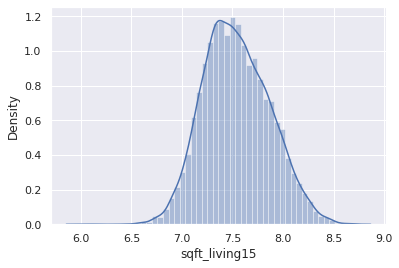

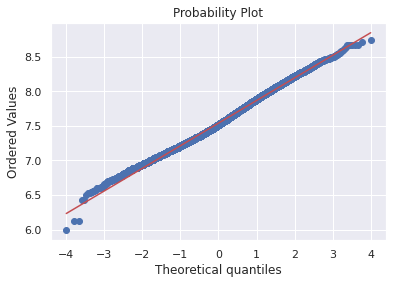

In [40]:
sns.distplot(full_data['sqft_living15']);
fig = plt.figure()
res = stats.probplot(full_data['sqft_living15'], plot=plt)

In [41]:
full_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13764,7304301005,20140523T000000,12.765688,3,1.00,6.917706,11244,1.0,0,0,4,7,6.917706,0,1947,0,98155,47.7467,-122.321,7.106606,11242
8475,6790900110,20140610T000000,13.241035,3,2.75,7.757906,16500,1.0,0,0,4,8,7.313220,840,1972,0,98075,47.5952,-122.051,7.700748,15251
3942,8861500015,20140520T000000,13.422468,3,2.25,7.595890,10260,2.0,0,0,4,8,7.595890,0,1987,0,98052,47.6801,-122.115,7.595890,10260
7696,3885807255,20150202T000000,13.543702,4,2.00,7.663877,5500,1.5,0,0,5,7,7.663877,0,1939,0,98033,47.6807,-122.199,7.306531,6000
1573,1974200060,20150424T000000,13.171154,4,2.50,7.783224,10070,1.0,0,0,3,7,7.319865,890,1967,0,98034,47.7104,-122.240,7.615791,9964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17997,205000410,20140915T000000,13.353475,3,2.50,7.749322,32772,2.0,0,0,3,9,7.749322,0,1992,0,98053,47.6304,-121.988,7.867106,33305
20913,1773100967,20150223T000000,12.611534,3,2.25,7.207860,1234,2.0,0,0,3,7,7.056175,190,2007,0,98106,47.5565,-122.363,7.258412,1234
6953,6150200280,20140821T000000,12.834681,2,1.00,7.501082,8527,1.5,0,0,4,7,7.501082,0,1943,0,98133,47.7275,-122.336,7.306531,6800
6508,4217402115,20150421T000000,15.110238,6,4.75,8.608860,19401,1.5,1,4,5,11,8.271293,1570,1936,0,98105,47.6515,-122.277,8.163371,15810


In [42]:
full_data = full_data.drop(['id', 'date', 'zipcode'], axis=1)

In [43]:
full_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
13764,12.765688,3,1.00,6.917706,11244,1.0,0,0,4,7,6.917706,0,1947,0,47.7467,-122.321,7.106606,11242
8475,13.241035,3,2.75,7.757906,16500,1.0,0,0,4,8,7.313220,840,1972,0,47.5952,-122.051,7.700748,15251
3942,13.422468,3,2.25,7.595890,10260,2.0,0,0,4,8,7.595890,0,1987,0,47.6801,-122.115,7.595890,10260
7696,13.543702,4,2.00,7.663877,5500,1.5,0,0,5,7,7.663877,0,1939,0,47.6807,-122.199,7.306531,6000
1573,13.171154,4,2.50,7.783224,10070,1.0,0,0,3,7,7.319865,890,1967,0,47.7104,-122.240,7.615791,9964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17997,13.353475,3,2.50,7.749322,32772,2.0,0,0,3,9,7.749322,0,1992,0,47.6304,-121.988,7.867106,33305
20913,12.611534,3,2.25,7.207860,1234,2.0,0,0,3,7,7.056175,190,2007,0,47.5565,-122.363,7.258412,1234
6953,12.834681,2,1.00,7.501082,8527,1.5,0,0,4,7,7.501082,0,1943,0,47.7275,-122.336,7.306531,6800
6508,15.110238,6,4.75,8.608860,19401,1.5,1,4,5,11,8.271293,1570,1936,0,47.6515,-122.277,8.163371,15810


In [44]:
full_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [45]:
full_data.loc[full_data['yr_renovated'] > 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
9710,14.014361,3,3.25,8.016318,5600,2.0,0,2,3,9,7.705262,810,1905,2005,47.5978,-122.292,7.620705,6600
3925,13.199324,6,3.00,7.962067,206474,2.0,0,0,3,7,7.753624,540,1960,1985,47.4010,-122.095,7.774856,59677
12839,12.273731,3,1.00,6.927558,9147,1.0,0,0,4,6,6.927558,0,1900,1965,47.3127,-122.002,7.377759,9700
11401,13.732129,3,1.75,7.816014,4000,1.0,0,0,3,8,7.122867,1240,1948,2014,47.6150,-122.288,7.803843,4000
834,12.428816,3,1.75,7.229839,14000,1.0,0,0,4,5,7.229839,0,1939,1957,47.2940,-122.281,7.306531,18503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,12.892950,3,1.00,7.299797,5100,1.5,0,0,3,7,7.299797,0,1938,1959,47.6915,-122.348,7.170120,5100
12507,13.493927,5,3.75,8.119696,6000,2.0,0,0,3,8,7.878534,720,1963,1999,47.5580,-122.277,7.565275,6000
19008,13.256020,4,1.75,7.560080,7455,1.0,0,0,4,7,6.866933,960,1939,1964,47.7106,-122.286,7.560080,7455
4768,11.944708,2,1.00,6.946976,20524,1.0,0,3,3,6,6.946976,0,1949,1989,47.6981,-121.875,7.539027,38996


In [46]:
full_data['price']

13764    12.765688
8475     13.241035
3942     13.422468
7696     13.543702
1573     13.171154
           ...    
17997    13.353475
20913    12.611534
6953     12.834681
6508     15.110238
13947    12.765688
Name: price, Length: 21611, dtype: float64

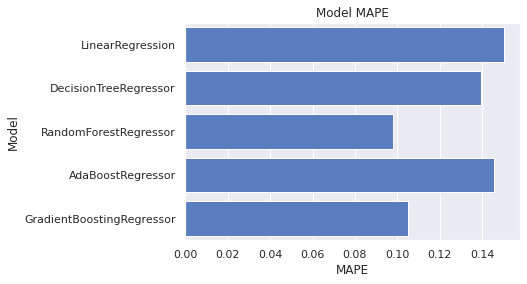

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

log_cols = ["Model", "MAPE"]
log = pd.DataFrame(columns=log_cols)

# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = full_data.iloc[:, 1:]
y = full_data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mape_dict = {}

# for train_index, test_index in sss.split(X, y.iloc[:, 1]):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
for mdl in models:
    name = mdl.__class__.__name__
    mdl.fit(X_train, y_train)
    train_predictions = mdl.predict(X_test)
    MAPE = mape(y_test, train_predictions)
        
    if name in mape_dict:
        mape_dict[name] += MAPE
    else:
        mape_dict[name] = MAPE

for mdl in mape_dict:
    mape_dict[mdl] = mape_dict[mdl] / 10.0
    log_entry = pd.DataFrame([[mdl, mape_dict[mdl]]], columns = log_cols)
    log = log.append(log_entry)

plt.xlabel('MAPE')
plt.title('Model MAPE')

sns.set_color_codes("muted")
sns.barplot(x = 'MAPE', y = 'Model', data = log, color = "b")

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_data.iloc[:, 1:], full_data['price'], test_size=0.3, random_state=42)

In [49]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [50]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

In [51]:
mape_result = mape(y_test, predictions)
print(mape_result)

1.504085434685931


In [52]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train, y_train)
a = gs_dt.best_params_

In [53]:
dtr = DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [54]:
mape_result = mape(y_test, predictions)
print(mape_result)

1.1839529597267477


In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train, y_train)
b = gs_rf.best_params_

In [58]:
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
mape_result = mape(y_test, predictions)
print(mape_result)

1.1839529597267477
